In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  linear_model
 
data= pd.read_csv('1.01. Simple linear regression.csv')
data.head()



,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


En este data set hay 84 datos; el SAT corresponde al promedio del examen de admisión a la universidad y GPA es el promedio universitario de calificaciones al momento de graduarse de la universidad

In [10]:
data.describe().round()

,SAT,GPA
count,84.0,84.0
mean,1845.0,3.0
std,105.0,0.0
min,1634.0,2.0
25%,1772.0,3.0
50%,1846.0,3.0
75%,1934.0,4.0
max,2050.0,4.0


In [11]:
# Identificaremos las variables, entonces:
x=data['SAT'] # x es la variable independiente
y=data['GPA'] # y es la variable dependiente

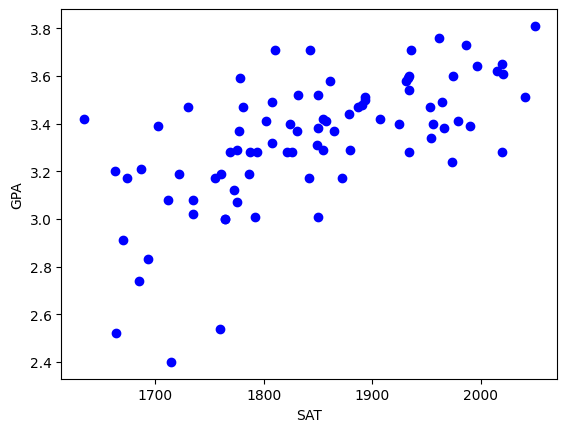

In [12]:
plt.scatter(x, y, color='blue')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [13]:
regresion=linear_model.LinearRegression()
sat=data['SAT'].values.reshape((-1,1))
modelo=regresion.fit(sat, data['GPA'])
print('interseccion (b): ', modelo.intercept_)
print('pendiente (m): ', modelo.coef_)

interseccion (b):  0.27504029966028076
pendiente (m):  [0.00165569]


In [14]:
# Get the R-squared score
r_squared = modelo.score(sat, data['GPA'])

print("R-squared score:", r_squared)

R-squared score: 0.40600391479679765


El R-cuadrado muestra cuánto de la variabilidad total del conjunto de datos es explicado por tu regresión. Esto podría ser expresado como: qué tan bien tu modelo se ajusta a tus datos. R cuadrado= variabilidad explicada por la regresion(SSR)/ variabilidad  del conjunto total de datos(SST)
En esta tabla encontramos R cuadrado: Un R al cuadrado cerca de 0 indica que tu regresión no explica la variabilidad de los datos, mientras un R cuadrado de 1 significaría que el modelo explica toda la variabilidad de los datos. Ahora, ¿De cuanto es un buen R cuadrado?: aunque no tenemos la respuesta, en la fisica y quimica los cientificos buscan usualmente buscan resultados de 0.7 y 0.99, sin embargo en las ciencias sociales como economía, finanzas y psicólogia, resultados de 0.2, es decir donde el 20% de la variabilidad es explicada con el modelo, es aceptable.
En este caso tenemos un R cuadrado de 0.406, es decir, los resultados SAT explican el 41% de la variabilida de la calificaciones del GPA.
Notando este que un 41% esta lejos de explicar los resultados de las notas del GPA entonces implicaría que hay otros determinantes que inciden en estos promedios, como pueden ser género o ingresos

Estos resultados lo que nos indica es que la pendiente se intecepta en el punto 0.275 y que las puntaciones del GPA se elevan en correspondencia al resultado del SAT en 0.00165569, hagamos una prueba...

In [15]:
entrada=[[1600], [1700], [1800], [1900]]
modelo.predict(entrada)

array([2.92414118, 3.08970998, 3.25527879, 3.42084759])

Los resultados de la prueba lo que estiman es que el promedio del sat de una persona con 1600 de puntuación, el GPA será de 2.92, y así, por cada valor de prueba que pusimos el GPA se ha ido incrementando en 0.00166569. Veamolo en una grafica...

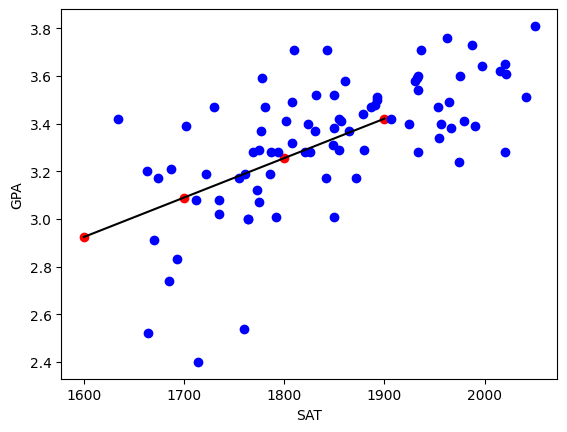

In [16]:
plt.scatter(entrada, modelo.predict(entrada), color='red')
plt.plot(entrada, modelo.predict(entrada), color='black')
plt.scatter(x,y, color='blue')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

Aquí vemos nustros datos de prueba más claramente y cómo se ubican en relacion con lo datos originales